In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt

DATAPATH = "../data"

In [2]:
mollib_25 = pd.read_csv(os.path.join(DATAPATH, "zairachem_outputs", "output_mollib_40e_2.5.csv"))
mollib_1 = pd.read_csv(os.path.join(DATAPATH, "zairachem_outputs", "output_mollib_40e_1.csv"))

data6_25 = pd.read_csv(os.path.join(DATAPATH, "zairachem_outputs", "output_data6_2.5.csv"))
data6_1 = pd.read_csv(os.path.join(DATAPATH, "zairachem_outputs", "output_data6_1.csv"))

eosi90_25 = pd.read_csv(os.path.join(DATAPATH, "zairachem_outputs", "output_eosi_s4_candidates_90_2.5.csv"))
eosi90_1 = pd.read_csv(os.path.join(DATAPATH, "zairachem_outputs", "output_eosi_s4_candidates_90_1.csv"))


In [3]:
#check different thresholds
print(len(data6_25[data6_25["clf_ex1_bin"]==1]))
print(len(data6_1[data6_1["clf_ex1_bin"]==1]))
print(len(mollib_25[mollib_25["clf_ex1_bin"]==1]))
print(len(mollib_1[mollib_1["clf_ex1_bin"]==1]))
print(len(eosi90_25[eosi90_25["clf_ex1_bin"]==1]))
print(len(eosi90_1[eosi90_1["clf_ex1_bin"]==1]))

8952
1920
552
274
87
41


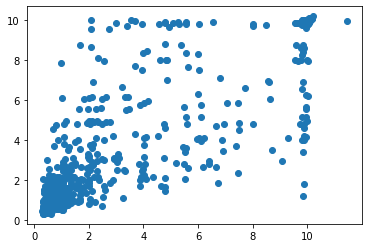

In [4]:
#check regression values from both models
mollib_25_reg = mollib_25["reg_raw"].tolist()
mollib_1_reg = mollib_1["reg_raw"].tolist()

plt.scatter(mollib_25_reg, mollib_1_reg)

In [5]:
#delete molecules that are predicted inactive with cut off 2.5 but active with cut off 1
data6_25_actives = data6_25[(data6_25["clf_ex1_bin"]==1) & (data6_25["reg_raw"]<=2.5)]
data6_1_actives = data6_1[(data6_1["clf_ex1_bin"]==1) & (data6_1["reg_raw"]<=1)]
data6_1_actives.reset_index(inplace=True)

mollib_25_actives = mollib_25[(mollib_25["clf_ex1_bin"]==1) & (mollib_25["reg_raw"]<=2.5)]
mollib_1_actives = mollib_1[(mollib_1["clf_ex1_bin"]==1) & (mollib_1["reg_raw"]<=1)]
mollib_1_actives.reset_index(inplace=True)

eosi90_25_actives = eosi90_25[(eosi90_25["clf_ex1_bin"]==1) & (eosi90_25["reg_raw"]<=2.5)]
eosi90_1_actives = eosi90_1[(eosi90_1["clf_ex1_bin"]==1) & (eosi90_1["reg_raw"]<=1)]
eosi90_1_actives.reset_index(inplace=True)


In [6]:
data6_25_smi = data6_25_actives["smiles"].tolist()
data6_1_smi = data6_1_actives["smiles"].tolist()

idx = []
for i,smi in enumerate(data6_1_smi):
    if smi not in data6_25_smi:
        idx += [i]

print(len(data6_1_actives))       
data6_1_actives.drop(index=idx, axis = 0, inplace=True)
print(len(data6_1_actives))

1118
1094


C:\Users\Gemma\Anaconda3\envs\malariaOSM\lib\site-packages\pandas\core\frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [7]:
mollib_25_smi = mollib_25_actives["smiles"].tolist()
mollib_1_smi = mollib_1_actives["smiles"].tolist()

idx = []
for i,smi in enumerate(mollib_1_smi):
    if smi not in mollib_25_smi:
        idx += [i]

print(len(mollib_1_actives))       
mollib_1_actives.drop(index=idx, axis = 0, inplace=True)
print(len(mollib_1_actives))

202
201


In [8]:
eosi90_25_smi = eosi90_25_actives["smiles"].tolist()
eosi90_1_smi = eosi90_1_actives["smiles"].tolist()

idx = []
for i,smi in enumerate(eosi90_1_smi):
    if smi not in eosi90_25_smi:
        idx += [i]

print(len(eosi90_1_actives))       
eosi90_1_actives.drop(index=idx, axis = 0, inplace=True)
print(len(eosi90_1_actives))

35
35


In [19]:
data6 = data6_1_actives[["compound_id", "smiles", "clf_ex1"]]
data6.rename(columns={"clf_ex1": "proba1_1.0uM"}, inplace=True)
data6 = pd.merge(data6, data6_25_actives[["smiles", "clf_ex1", "reg_raw"]], on = "smiles", how="left")
data6.rename(columns={"clf_ex1":"proba1_2.5uM", "reg_raw": "IC50_pred"})

C:\Users\Gemma\Anaconda3\envs\malariaOSM\lib\site-packages\pandas\core\frame.py:4449: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [24]:
mollib = mollib_1_actives[["compound_id", "smiles", "clf_ex1"]]
mollib.rename(columns={"clf_ex1": "proba1_1.0uM"}, inplace=True)
mollib = pd.merge(mollib, mollib_25_actives[["smiles", "clf_ex1", "reg_raw"]], on = "smiles", how="left")
mollib.rename(columns={"clf_ex1":"proba1_2.5uM", "reg_raw": "IC50_pred"})

C:\Users\Gemma\Anaconda3\envs\malariaOSM\lib\site-packages\pandas\core\frame.py:4449: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,compound_id,smiles,proba1_1.0uM,proba1_2.5uM,IC50_pred
0,CID492,OCC(COc1cncc2nnc(-c3ccc(OC(F)F)cc3)n12)OCc1cc(...,0.599075,0.714662,0.430013
1,CID300,COc1ccc(C(F)(F)CCOc2cncc3nnc(-c4ccc(OC(F)F)cc4...,0.636015,0.760307,0.361933
2,CID401,Fc1ccc(-c2nnc3cncc(OCCc4ccc(F)c(F)c4)n23)c(C(F...,0.571989,0.709670,0.639516
3,CID566,O=C(NCc1ccc(F)cc1)c1cncc2nnc(-c3ccc(OC(F)F)c(F...,0.573316,0.812679,0.321097
4,CID251,Fc1ccc(OCCC(F)(F)c2cncc3nnc(-c4ccc(OC(F)F)cc4)...,0.620455,0.829069,0.329206
...,...,...,...,...,...
196,CID413,Fc1cc(OC(F)(F)COCOCc2cncc3nnc(-c4ccc(OC(F)F)cc...,0.660241,0.772936,0.388522
197,CID597,CC1(C)OCC(COc2ncc3nnc(-c4ccc(OC(F)F)cc4)n3c2F)...,0.546238,0.708959,1.078224
198,CID136,OCc1ccc(-c2nnc3cncc(COCc4ccc(OC(F)F)cc4)n23)cc1F,0.545626,0.675876,1.243087
199,CID556,OC(F)(c1ccc(-c2nnc3cncc(OCC4(c5ccc(F)c(F)c5)CO...,0.509173,0.662872,0.821972


In [25]:
long_sel = pd.concat([data6, mollib])
long_sel.drop(columns="compound_id", inplace=True)
long_sel.to_csv(os.path.join(DATAPATH, "High_actives_all.csv"), index=False)

In [32]:
eosi90 = eosi90_1_actives[["compound_id", "smiles", "clf_ex1"]]
eosi90.rename(columns={"clf_ex1": "proba1_1.0uM"}, inplace=True)
eosi90 = pd.merge(eosi90, eosi90_25_actives[["smiles", "clf_ex1", "reg_raw"]], on = "smiles", how="left")
eosi90.rename(columns={"clf_ex1":"proba1_2.5uM", "reg_raw": "IC50_pred"})
eosi90.to_csv(os.path.join(DATAPATH, "high_actives_selection.csv"), index=False)

C:\Users\Gemma\Anaconda3\envs\malariaOSM\lib\site-packages\pandas\core\frame.py:4449: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,compound_id,smiles,proba1_1.0uM,proba1_2.5uM,IC50_pred
0,EOS-00,COC(COc1cncc2nnc(-c3ccc(F)c(F)c3)n12)c1ccc(OC(...,0.664351,0.761076,0.382326
1,EOS-01,OCC(Oc1cncc2nnc(-c3ccc(OC(F)F)cc3)n12)c1c(Cl)c...,0.630374,0.818284,0.451978
2,EOS-02,Fc1ccc(OCCc2cncc3nnc(-c4ccc(OC(F)F)cc4)n23)cc1F,0.626777,0.807352,0.372928
3,EOS-03,OCc1cc(-c2nnc3cncc(OCCC(F)(F)c4ccc(OC(F)F)cc4)...,0.643265,0.756974,0.367185
4,EOS-04,Fc1cccc(OC(F)COc2cncc3nnc(-c4ccc(OC(F)F)cc4)n2...,0.630274,0.778453,0.381536
5,EOS-07,COC(CO)(c1ccc(F)c(F)c1)c1cncc2nnc(-c3ccc(OC(F)...,0.651530,0.709960,0.470001
6,EOS-08,O=C(Cc1ccc(Cl)cc1Cl)Oc1cncc2nnc(-c3ccc(OC(F)F)...,0.547323,0.729465,0.430011
7,EOS-09,OC(COCc1cncc2nnc(-c3ccc(OC(F)F)cc3)n12)c1ccc(F...,0.586234,0.709526,0.471800
8,EOS-10,CC(CCOc1cncc2nnc(-c3ccc(F)c(CO)c3)n12)Oc1ccc(C...,0.594223,0.691189,0.729091
9,EOS-12,FC(F)Oc1ccc(-c2nnc3cncc(OCC4COc5cccc(C(F)(F)F)...,0.517791,0.775963,0.382044
